### Regression

In [1]:
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing()

In [2]:
type(cal_housing) # bunch is like a dictionary

sklearn.utils.Bunch

In [3]:
cal_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
type(cal_housing['data'])

numpy.ndarray

In [5]:
cal_housing['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
cal_housing['DESCR']

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

In [7]:
cal_housing['target'][:10]

array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267,
       2.611])

In [8]:
from sklearn.ensemble import RandomForestRegressor

X, y = cal_housing['data'], cal_housing['target']

clf = RandomForestRegressor() # clf for classifier

clf.fit(X, y) # train

RandomForestRegressor()

In [9]:
clf.score(X, y)

0.9739134691752989

In [10]:
# r-squared method
# clf.score? 

In [11]:
# lot of attributes
dir(clf) # ignore ones starting w/ double underscore
            # ones starting w/ no underscore, ending in one underscore are most interesting estimators

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'decision_path',
 'estimator_params

In [12]:
clf.n_features_in_

8

In [13]:
X.shape

(20640, 8)

In [14]:
from sklearn.tree import export_graphviz

export_graphviz(
    clf.estimators_[0],
    'tree.dot',
    feature_names=cal_housing['feature_names'],
    max_depth=5,
)
!dot -Tsvg -o tree.svg tree.dot

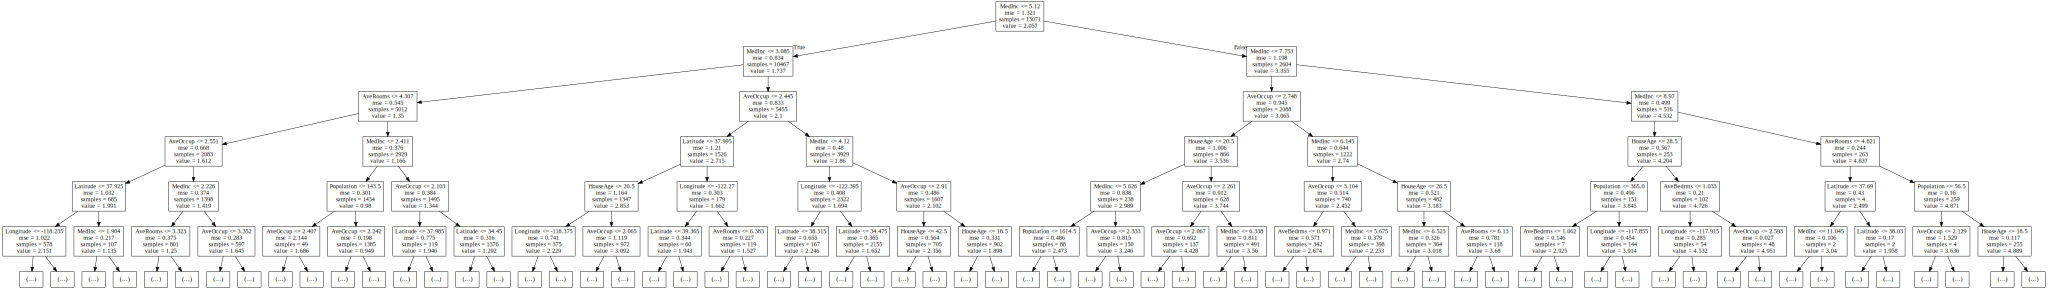

In [15]:
from IPython import display

display.SVG('tree.svg')

In [16]:
i = 17 # 17th row, predicting house value for this row
row = X[i:i+1]
row.shape

(1, 8)

In [17]:
# prediction
clf.predict(row)

array([1.55287])

In [18]:
# actual value
y[i] # pretty close

1.555

### Train Test Split

In [19]:
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing()
X, y = cal_housing['data'], cal_housing['target']
X.shape

(20640, 8)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
)
X_train.shape

(14448, 8)

In [21]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train, y_train)
clf.score(X_test, y_test) # score of 0.8, not the best

0.803942832687146

### Preprocessing Data

In [22]:
from sklearn.datasets import fetch_california_housing

cal_housing = fetch_california_housing(as_frame=True)
df = cal_housing['data']
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [23]:
from sklearn.model_selection import train_test_split

X, y = cal_housing['data'], cal_housing['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
)
X_train.shape

(14448, 8)

In [24]:
from sklearn.svm import SVR

# support vector regression
clf = SVR() # pretty sensitive
clf.fit(X_train, y_train)
clf.score(X_test, y_test) # pretty bad score

-0.01987502749034009

In [25]:
from sklearn import preprocessing 

X_scaled = preprocessing.scale(X)

In [26]:
# instead we scale all values, to the same range to get a better score
import pandas as pd

df = pd.DataFrame(
    X_scaled, 
    columns=cal_housing['feature_names']
)
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,3.734255e-16,8.557001e-16,2.704111e-16,-1.531384e-16,-6.465442e-17,6.064808e-19,1.256263e-15,-6.527810e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.3,
)

clf = SVR() 
clf.fit(X_train, y_train)
clf.score(X_test, y_test) # MUCH much better score

0.7363156403791815

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
X_pca.shape # now we have 4 columns

(20640, 4)

### Composing Pipelines

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing()

X, y = cal_housing['data'], cal_housing['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
)

In [30]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

pipe = Pipeline([ # creating object
    ('scale', StandardScaler()), # each step has a name
    ('pca', PCA(n_components=4)),
    ('svr', SVR()),    
])

In [31]:
pipe.fit(X_train, y_train) # calling fit method on pipe object
pipe.score(X_test, y_test) 

0.5764721214672448

In [32]:
pipe.steps

[('scale', StandardScaler()), ('pca', PCA(n_components=4)), ('svr', SVR())]

In [33]:
# can get parameters for each step
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('pca', PCA(n_components=4)),
  ('svr', SVR())],
 'verbose': False,
 'scale': StandardScaler(),
 'pca': PCA(n_components=4),
 'svr': SVR(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 4,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'svr__C': 1.0,
 'svr__cache_size': 200,
 'svr__coef0': 0.0,
 'svr__degree': 3,
 'svr__epsilon': 0.1,
 'svr__gamma': 'scale',
 'svr__kernel': 'rbf',
 'svr__max_iter': -1,
 'svr__shrinking': True,
 'svr__tol': 0.001,
 'svr__verbose': False}

In [34]:
# can also set parameters from here
pipe.set_params(svr__C=0.9)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=4)),
                ('svr', SVR(C=0.9))])

### Saving and Loading Models

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [36]:
cal_housing = fetch_california_housing()

X, y = cal_housing['data'], cal_housing['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
)

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=4)),
    ('svr', SVR()),    
])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5464778530936836

In [37]:
import pickle

out_file = 'model.pkl'

with open(out_file, 'wb') as out:
         pickle.dump(pipe, out)

In [38]:
with open(out_file, 'rb') as fp:
         pipe1 = pickle.load(fp)
pipe1.score(X_test, y_test) # matches the score from the original pipe

0.5464778530936836

### Challenge

In [39]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits['data'], digits['target']

4


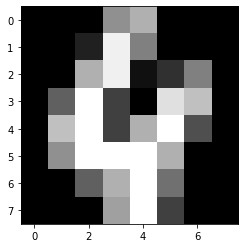

In [40]:
import matplotlib.pyplot as plt

i = 353
print(y[i])
img = digits['images'][i]
plt.imshow(img, cmap='gray')

In [41]:
img.shape

(8, 8)

In [42]:
X.shape

(1797, 64)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [44]:
pipe = Pipeline([
    ('pca', PCA(n_components=10)),
    ('clf', KNeighborsClassifier()),
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
)

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9777777777777777

In [45]:
import pickle

kb = 2**10 # kilobyte

data = pickle.dumps(pipe)
len(data)/kb

260.7373046875